<ipython-input-42-8c7cb220adb7>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_dataset['label'].replace(0, 'Benign',inplace=True)


K = 1: Accuracy = 0.9737, Precision = 0.9706, Recall = 0.9851
K = 2: Accuracy = 0.9737, Precision = 0.9653, Recall = 0.9925
K = 3: Accuracy = 0.9678, Precision = 0.9671, Recall = 0.9805
K = 4: Accuracy = 0.9693, Precision = 0.9686, Recall = 0.9820
K = 5: Accuracy = 0.9719, Precision = 0.9749, Recall = 0.9806
K = 6: Accuracy = 0.9737, Precision = 0.9742, Recall = 0.9838
K = 7: Accuracy = 0.9749, Precision = 0.9754, Recall = 0.9837
K = 8: Accuracy = 0.9759, Precision = 0.9752, Recall = 0.9857
K = 9: Accuracy = 0.9756, Precision = 0.9747, Recall = 0.9857
K = 10: Accuracy = 0.9763, Precision = 0.9746, Recall = 0.9871
K = 11: Accuracy = 0.9753, Precision = 0.9745, Recall = 0.9859
K = 12: Accuracy = 0.9751, Precision = 0.9745, Recall = 0.9859
K = 13: Accuracy = 0.9750, Precision = 0.9731, Recall = 0.9870
K = 14: Accuracy = 0.9743, Precision = 0.9723, Recall = 0.9870
K = 15: Accuracy = 0.9743, Precision = 0.9715, Recall = 0.9879


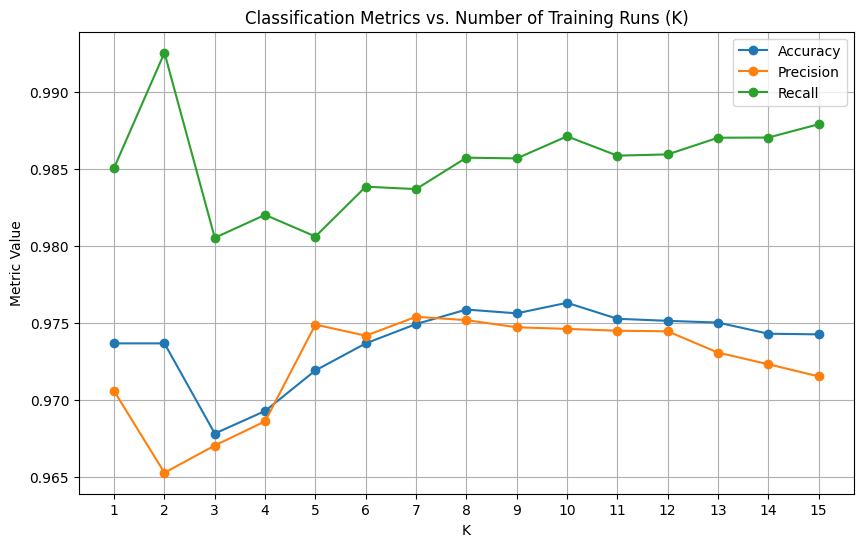

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)
breast_labels = breast.target
breast_labels = breast_labels.reshape(569,1)
final_breast_data = np.concatenate([breast_data, breast_labels], axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score


K_values = range(1, 16)

accuracy_scores = []
precision_scores = []
recall_scores = []

for K in K_values:
    temp_accuracy = []
    temp_precision = []
    temp_recall = []

    for i in range(K):
        X = breast_dataset.drop('label', axis=1)
        y = breast_dataset['label']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        pca = PCA(n_components=0.95)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

        svm_classifier = SVC(kernel='linear')
        svm_classifier.fit(X_train, y_train)

        y_pred = svm_classifier.predict(X_test)
        temp_accuracy.append(accuracy_score(y_test, y_pred))
        temp_precision.append(precision_score(y_test, y_pred, pos_label='Malignant'))
        temp_recall.append(recall_score(y_test, y_pred, pos_label='Malignant'))

    accuracy_scores.append(np.mean(temp_accuracy))
    precision_scores.append(np.mean(temp_precision))
    recall_scores.append(np.mean(temp_recall))

for i, k in enumerate(K_values):
    print(f"K = {k}: Accuracy = {accuracy_scores[i]:.4f}, Precision = {precision_scores[i]:.4f}, Recall = {recall_scores[i]:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(K_values, accuracy_scores, marker='o', label='Accuracy')
plt.plot(K_values, precision_scores, marker='o', label='Precision')
plt.plot(K_values, recall_scores, marker='o', label='Recall')
plt.title('Classification Metrics vs. Number of Training Runs (K)')
plt.xlabel('K')
plt.ylabel('Metric Value')
plt.xticks(K_values)
plt.legend()
plt.grid(True)
plt.show()

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea'],
      dtype='object')


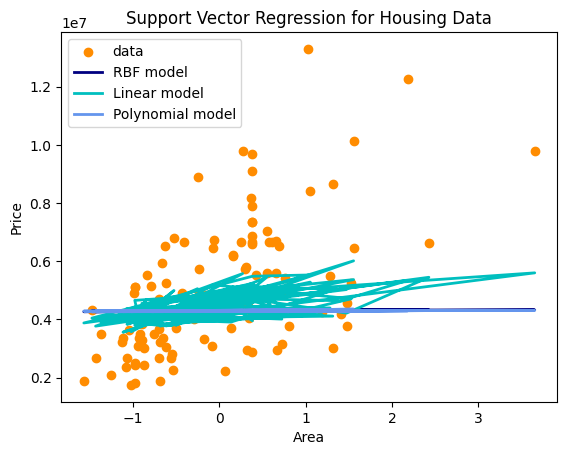

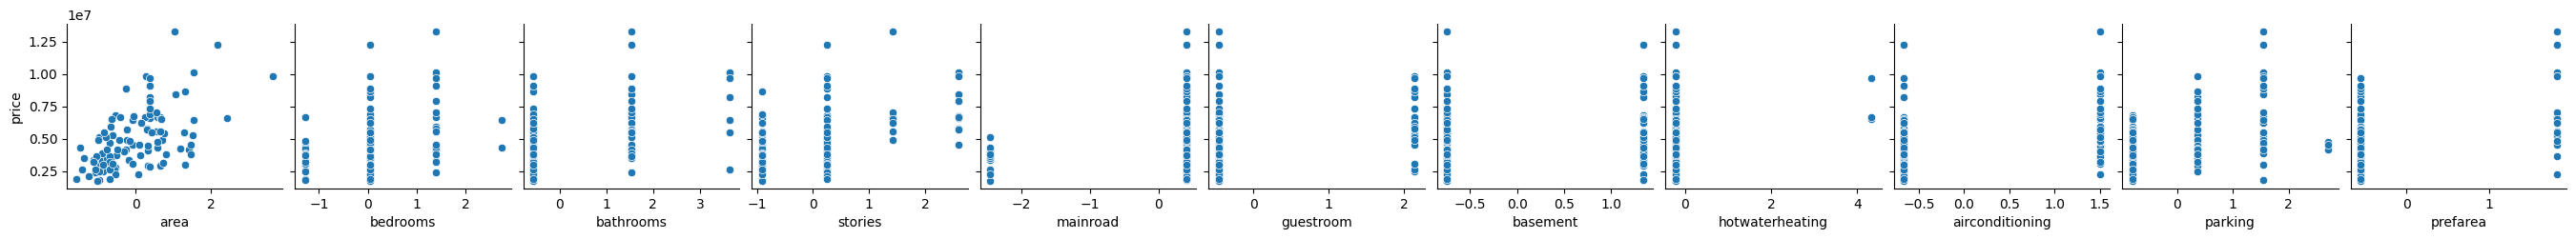

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'

df = pd.DataFrame(pd.read_csv(url))
df.head()

housing = df.drop('furnishingstatus', axis=1)

housing.isnull().sum()*100/housing.shape[0]

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
housing_train, housing_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Print DataFrame column names
print(housing.columns)
# Assuming 'X' contains your features and 'y' contains the target variable 'price'
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
            'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = housing[features]
y = housing['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train SVR models with different kernels
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

svr_rbf.fit(X_train, y_train)
svr_lin.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)

# Make predictions on the test set
y_rbf = svr_rbf.predict(X_test)
y_lin = svr_lin.predict(X_test)
y_poly = svr_poly.predict(X_test)

# Visualize the results (example using 'area' as the x-axis)
lw = 2
plt.scatter(X_test[:, 0], y_test, color='darkorange', label='data')  # Assuming 'area' is the first feature
plt.plot(X_test[:, 0], y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X_test[:, 0], y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X_test[:, 0], y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Support Vector Regression for Housing Data')
plt.legend()
plt.show

import seaborn as sns

# Assuming 'X_test' contains your test features and 'y_test' the target
y_test_array = np.array(y_test)  # Convert y_test to a NumPy array
sns.pairplot(pd.DataFrame(np.hstack([X_test, y_test_array.reshape(-1, 1)]),
                           columns=features + ['price']),
             x_vars=features, y_vars=['price'], kind='scatter', diag_kind=None)
plt.show()

K = 15:
  Linear Kernel: Average RMSE = 1874642.0126
  RBF Kernel: Average RMSE = 1875202.0814
  Poly Kernel: Average RMSE = 1875189.7795


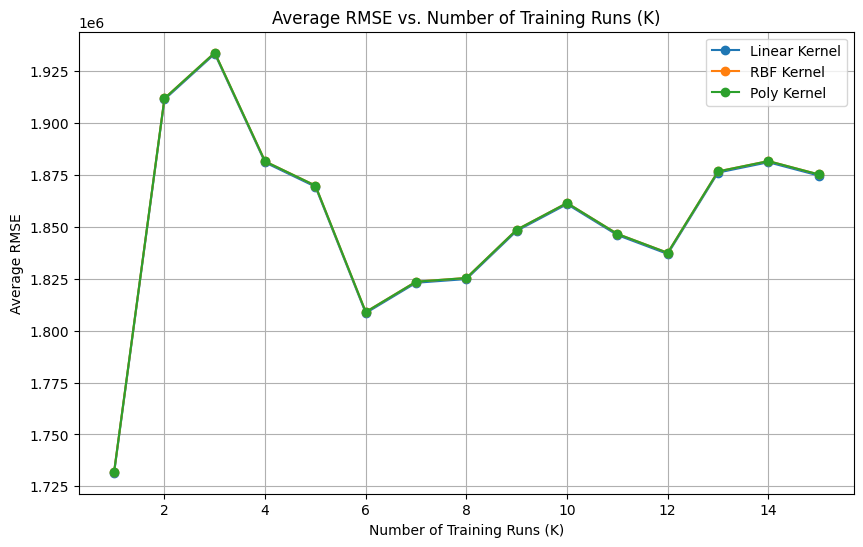

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'

df = pd.DataFrame(pd.read_csv(url))
df.head()

housing = df.drop('furnishingstatus', axis=1)

housing.isnull().sum()*100/housing.shape[0]

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
housing_train, housing_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

housing_train[num_vars] = scaler.fit_transform(housing_train[num_vars])
housing_train.head()

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# ... (Your existing code for loading and preprocessing housing data) ...

# Define features (X) and target (y)
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
            'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = housing[features]
y = housing['price']

# Define the range of K values
K_values = range(1, 16)  # Explore K from 1 to 15

# Store results for each kernel and K value
results_linear = []
results_rbf = []
results_poly = []

# Iterate through K values
for K in K_values:
    temp_rmse_scores_linear = []
    temp_rmse_scores_rbf = []
    temp_rmse_scores_poly = []

    # Perform N independent training runs
    for i in range(K):
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        # Scale data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Apply PCA
        pca = PCA(n_components=0.95)  # Keep components explaining 95% of variance
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train and evaluate SVR models for each kernel
        for kernel in ['linear', 'rbf', 'poly']:
            svr_model = SVR(kernel=kernel)  # Create SVR model with the current kernel
            svr_model.fit(X_train_pca, y_train)
            y_pred = svr_model.predict(X_test_pca)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))

            if kernel == 'linear':
              temp_rmse_scores_linear.append(rmse)
            elif kernel == 'rbf':
              temp_rmse_scores_rbf.append(rmse)
            elif kernel == 'poly':
              temp_rmse_scores_poly.append(rmse)

    # Calculate and store average RMSE for each kernel over N runs
    results_linear.append(np.mean(temp_rmse_scores_linear))
    results_rbf.append(np.mean(temp_rmse_scores_rbf))
    results_poly.append(np.mean(temp_rmse_scores_poly))
print(f"K = {K}:")
print(f"  Linear Kernel: Average RMSE = {results_linear[-1]:.4f}")
print(f"  RBF Kernel: Average RMSE = {results_rbf[-1]:.4f}")
print(f"  Poly Kernel: Average RMSE = {results_poly[-1]:.4f}")
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(K_values, results_linear, marker='o', label=f'Linear Kernel')
plt.plot(K_values, results_rbf, marker='o', label=f'RBF Kernel')
plt.plot(K_values, results_poly, marker='o', label=f'Poly Kernel')
plt.xlabel('Number of Training Runs (K)')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs. Number of Training Runs (K)')
plt.legend()
plt.grid(True)
plt.show()
